##### BAH Boubacar

# Présentation du sujet

L'estimation du prix d'une police d'assurance automobile est un sujet crucial dans l'industrie de l'assurance. En effet, il est important pour les compagnies d'assurance de déterminer le juste prix pour chaque assuré, afin de garantir leur rentabilité tout en offrant une protection adéquate aux conducteurs. Dans ce projet, nous nous intéressons à la prédiction du prix d'assurance pour un assuré donné en fonction de différents paramètres, tels que l'âge, le genre, la puissance du véhicule, etc. Nous allons également classer les conducteurs en trois catégories : dangereux, à surveiller et bon conducteur, et leur attribuer une note en fonction du nombre et de la valeur des sinistres déclarés. L'objectif est de fournir aux compagnies d'assurance un outil efficace pour évaluer le risque d'un assuré et déterminer le prix de sa police d'assurance de manière précise et équitable.

# Descprition de la base de donnée
Le dataset brvehins1 est dataframes contenant des données sur les polices d'assurance basées sur le système statistique pour automobiles (AUTOSEG). 
Le dataset contien 23 variables:
- **Gender**: 
    - le genre de l'assuré (Femme/Homme)
- **DrivAge**: 
    - l'âge de l'assuré par catégories (plus de 55 ans, entre 36-45 ans, entre 18-25 ans, etc.)
- **VehYear**: 
    - l'année de fabrication du véhicule assuré
- **VehModel**: 
    - le modèle de véhicule assuré
- **VehGroup**: 
    - le groupe auquel appartient le modèle de véhicule assuré
- **Area**: 
    - la région géographique où se trouve le véhicule assuré (Intérieur, Maranhao, Mato Grosso do Sul, etc.)
- **State**: 
    - l'État où se trouve le véhicule assuré
- **StateAb**: 
     - l'abréviation de l'État où se trouve le véhicule assuré
- **ExposTotal**:
    - l'exposition totale (en années) du véhicule assuré
- **ExposFireRob**: 
    - l'exposition totale (en années) du véhicule assuré au risque d'incendie/vol
- **PremTotal**: 
    - la prime totale payée pour l'assurance du véhicule
- **PremFireRob**: 
    - la prime payée pour l'assurance du véhicule contre les risques d'incendie/vol
- **SumInsAvg**: 
    - la somme assurée moyenne pour le véhicule
- **ClaimNbRob**: 
    - le nombre de réclamations pour vol/incendie
- **ClaimNbPartColl**: 
    - le nombre de réclamations pour collision partielle
- **ClaimNbTotColl**: 
    - le nombre de réclamations pour collision totale
- **ClaimNbFire**:
    - le nombre de réclamations pour incendie
- **ClaimNbOther**: 
    - le nombre de réclamations pour tout autre type de sinistre
- **ClaimAmountRob**: 
    - le montant total réclamé pour vol/incendie
- **ClaimAmountPartColl**: 
    - le montant total réclamé pour collision partielle
- **ClaimAmountTotColl**:
    - le montant total réclamé pour collision totale
- **ClaimAmountFire**: 
    - le montant total réclamé pour incendie
- **ClaimAmountOther**: 
    - le montant total réclamé pour tout autre type de sinistre et 
- ***Unnamed: 0*** 
    - l'identifiant du véhicule assuré
 

# Analyste descpritive

In [1]:
# Importation des modules nécessaire
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from math import *
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression


In [2]:
# Traitement des données et encodages des variables
data = pd.read_csv('brvehins1a.csv', sep=",")
print(data.columns)

Index(['Unnamed: 0', 'Gender', 'DrivAge', 'VehYear', 'VehModel', 'VehGroup',
       'Area', 'State', 'StateAb', 'ExposTotal', 'ExposFireRob', 'PremTotal',
       'PremFireRob', 'SumInsAvg', 'ClaimNbRob', 'ClaimNbPartColl',
       'ClaimNbTotColl', 'ClaimNbFire', 'ClaimNbOther', 'ClaimAmountRob',
       'ClaimAmountPartColl', 'ClaimAmountTotColl', 'ClaimAmountFire',
       'ClaimAmountOther'],
      dtype='object')


Notre dataframe contient **393071** lignes  et  **24** colonnes.

In [3]:
# Suppression de la colonne  Unnamed: 0 

data = data.drop(columns = "Unnamed: 0")


In [4]:
# Compter le nombre de valeurs manquantes pour chaque variable
missing_values_count = data.isnull().sum()
missing_values_count

Gender                 17749
DrivAge                57098
VehYear                    1
VehModel               23915
VehGroup               23915
Area                       7
State                      7
StateAb                    7
ExposTotal                 0
ExposFireRob               0
PremTotal                  0
PremFireRob                0
SumInsAvg                  0
ClaimNbRob                 0
ClaimNbPartColl            0
ClaimNbTotColl             0
ClaimNbFire                0
ClaimNbOther               0
ClaimAmountRob             0
ClaimAmountPartColl        0
ClaimAmountTotColl         0
ClaimAmountFire            0
ClaimAmountOther           0
dtype: int64

In [5]:
# Suppression des valeurs manquantes
data.shape

(393071, 23)

Notre nouveau dataframe contient **309587** et **23** lignes

In [6]:
# Information sur les variables 
data.info

<bound method DataFrame.info of         Gender DrivAge  VehYear  \
0       Female     >55   1997.0   
1       Female   36-45   2010.0   
2       Female   18-25   2008.0   
3         Male     >55   2004.0   
4         Male   36-45   2009.0   
...        ...     ...      ...   
393066    Male   36-45   2010.0   
393067    Male   36-45   2004.0   
393068  Female   26-35   1999.0   
393069  Female   26-35   2008.0   
393070    Male   46-55   2009.0   

                                                 VehModel  \
0               Gm - Chevrolet - Kadett Gl 2.0 Mpfi / Efi   
1       Gm - Chevrolet - Montana 1.4 8v Conquest Econo...   
2       Vw - Volkswagen - Fox City 1.0mi/ 1.0mi Total ...   
3                               Harley-davidson - Fat Boy   
4                          Volvo - Fh 440 6x2 2p (diesel)   
...                                                   ...   
393066  Vw - Volkswagen - Fox City 1.0mi/ 1.0mi Total ...   
393067         Toyota - Corolla Xei 1.8/1.8 Flex 16v Aut.  

In [7]:
# Identification du type des variables
data.dtypes

Gender                  object
DrivAge                 object
VehYear                float64
VehModel                object
VehGroup                object
Area                    object
State                   object
StateAb                 object
ExposTotal             float64
ExposFireRob             int64
PremTotal              float64
PremFireRob              int64
SumInsAvg              float64
ClaimNbRob               int64
ClaimNbPartColl          int64
ClaimNbTotColl           int64
ClaimNbFire              int64
ClaimNbOther             int64
ClaimAmountRob         float64
ClaimAmountPartColl      int64
ClaimAmountTotColl     float64
ClaimAmountFire          int64
ClaimAmountOther         int64
dtype: object

In [8]:
# Desciption des varibales numériques 
data.describe()

,VehYear,ExposTotal,ExposFireRob,PremTotal,PremFireRob,SumInsAvg,ClaimNbRob,ClaimNbPartColl,ClaimNbTotColl,ClaimNbFire,ClaimNbOther,ClaimAmountRob,ClaimAmountPartColl,ClaimAmountTotColl,ClaimAmountFire,ClaimAmountOther
count,393070.000000,393071.000000,393071.0,3.930710e+05,393071.0,393071.000000,393071.000000,393071.000000,393071.000000,393071.000000,393071.000000,393071.000000,3.930710e+05,393071.000000,393071.000000,393071.000000
mean,2005.178706,3.207031,0.0,3.765200e+03,0.0,39502.608581,0.029684,0.222311,0.018780,0.000771,0.480771,721.147238,8.462978e+02,622.666918,17.943595,154.035365
std,6.283377,14.950459,0.0,1.695018e+04,0.0,38830.224376,0.298092,1.412282,0.157539,0.029270,5.216617,7659.622287,6.091175e+03,6370.453569,1136.037975,3011.046717
min,0.000000,0.000000,0.0,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2003.000000,0.400000,0.0,3.422350e+02,0.0,18628.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,2007.000000,0.540000,0.0,8.945900e+02,0.0,29825.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,2009.000000,1.830000,0.0,2.520870e+03,0.0,48279.335000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
max,2012.000000,1829.910000,0.0,3.111159e+06,0.0,860006.990000,90.000000,249.000000,20.000000,3.000000,1278.000000,875853.000000,1.363938e+06,697220.000000,253721.000000,967914.000000


## Affichage de la distribution des variables 

### Affichage de la distribution des variables numériques

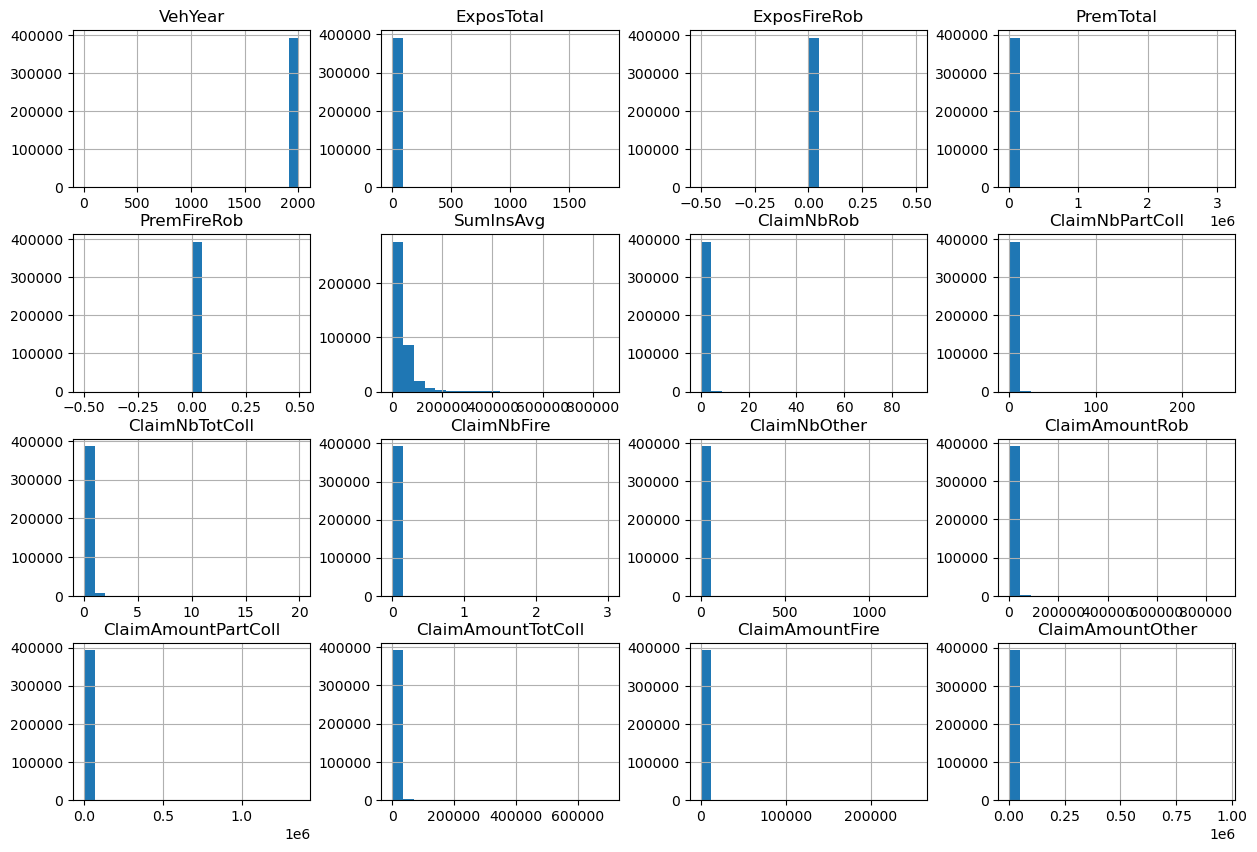

In [9]:
data.hist(bins=20, figsize=(15,10))
plt.show()

De ce premier plot, nous pouvons pouvons remarquer que: les valeurs se conscentrent au tour de 0, à part les graphiques de  et **VehYeay** qui correspond à l'année de construction du véhicule et **SumInsAvg** la somme assurée moyenne pour le véhicule.

### Afficher la distribution des variables catégorielles

In [10]:

for col in data.select_dtypes(include=['object']):
    print(data[col].value_counts(normalize=True))

Male         0.455846
Female       0.344147
Corporate    0.200007
Name: Gender, dtype: float64
36-45    0.256595
46-55    0.236373
>55      0.228069
26-35    0.202537
18-25    0.076426
Name: DrivAge, dtype: float64
Outros                                            0.014295
Fiat - Uno Mille 1.0 Fire/ F.flex/ Economy 4p     0.004835
Fiat - Uno Mille 1.0 Fire/ F.flex/ Economy 2p     0.004269
Toyota - Corolla Xei 1.8/1.8 Flex 16v Aut.        0.004063
Ford - Ecosport Xlt 1.6/ 1.6 Flex 8v 5p           0.003990
                                                    ...   
Peugeot - 406 Sedan 3.0 V6 24v                    0.000003
Bmw - 528ia High                                  0.000003
Lexus - Ls 430 4.3 32v 281cv                      0.000003
Kia Motors - Clarus Wagon Glx 2.0 16v Aut.        0.000003
Gm - Chevrolet - Trafic Passageiros 2.1 Diesel    0.000003
Name: VehModel, Length: 3834, dtype: float64
Vw Volkswagen Gol 1.0               0.027219
Fiat Palio 1.0                      0.025986
G

### Matrice de confusion

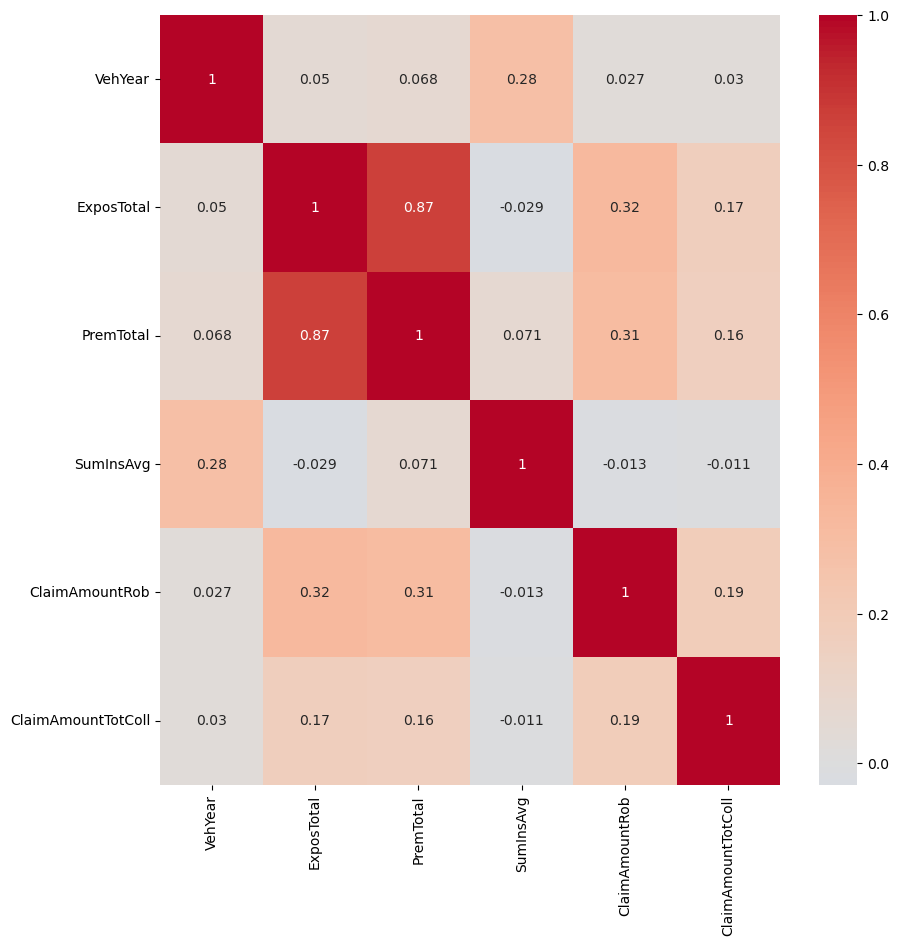

In [11]:
corr = data.select_dtypes(include=['float64']).corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, center=0)
plt.show()

Il y'a une très forte corrélation entre l'année de construction du véhicule et  la prime totale payée pour l'assurance du véhicule. **corr(VehYear, PremTotal) = 0.92**

**Suppression des variables sans interêt:**
Nous Pouvons donc supprimer les variables qui ne sont corrélées avec aucune autre variables

In [12]:
data = data.drop(['PremFireRob', 'Area', 'State', 'VehModel'], axis=1)

**Distribution des assurés par genre**:
***Corporate*** si le véhicule assuré appartient à une entreprise

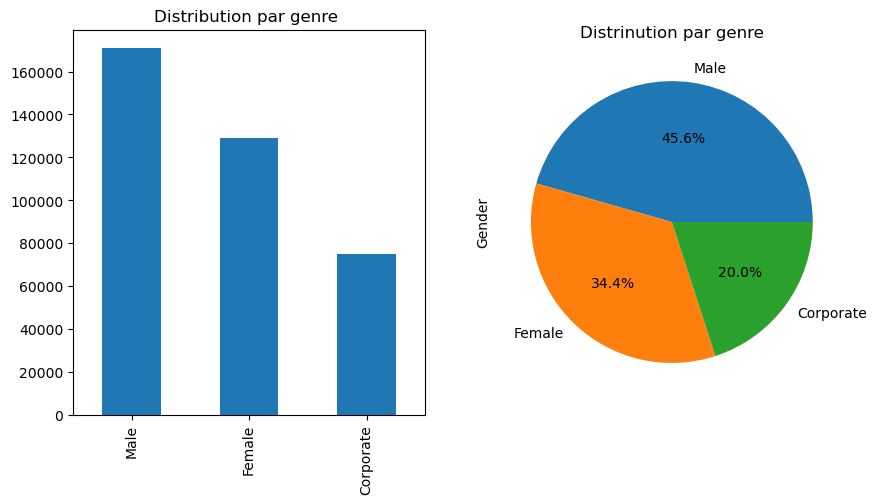

In [13]:
# Repartiton  par genre 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot bar chart sur le premier axe
data['Gender'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Distribution par genre ')

# Plot pie chart sur le deuxième axe
data['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%', ax=ax2)
ax2.set_title('Distrinution par genre')

# Afficher le graphique
plt.show()

# Construction des étiquettes

## Division de la base de données en deux: 

- **No_claim**: Les personnes n'ayant jamais déclaré un sinistre.

In [14]:
No_claim = data[(data["ClaimAmountRob"] == 0) & (data["ClaimAmountPartColl"] == 0)
                & (data["ClaimAmountTotColl"] == 0) & (data["ClaimAmountFire"] == 0)
                & (data["ClaimAmountOther"] == 0)].shape
No_claim


(319910, 19)

- **dfsinistre**: Les personnes ayant déclaré au moins un sinistre.

In [15]:
dfsinistre = data[(data["ClaimNbRob"] != 0) |
                  (data["ClaimNbPartColl"] != 0) | (data["ClaimNbTotColl"] != 0) |
                  (data["ClaimNbFire"] != 0) | (data["ClaimNbOther"] != 0)]
dfsinistre
print(dfsinistre["DrivAge"].unique())

['36-45' '26-35' nan '>55' '46-55' '18-25']


In [16]:
# Pour eviter les messages de warnings après l'utilisation de .loc
dfsinistre = dfsinistre.copy()

In [17]:
dfsinistre.loc[:, ['ClaimAmountRob', 'ClaimAmountPartColl',
                   'ClaimAmountTotColl', 'ClaimAmountFire',
                   'ClaimAmountOther']] = dfsinistre.loc[:, ['ClaimAmountRob', 'ClaimAmountPartColl',
                                                             
                                                             'ClaimAmountTotColl', 'ClaimAmountFire',
                                                             'ClaimAmountOther']].astype(float)

dfsinistre

,Gender,DrivAge,VehYear,VehGroup,StateAb,ExposTotal,ExposFireRob,PremTotal,SumInsAvg,ClaimNbRob,ClaimNbPartColl,ClaimNbTotColl,ClaimNbFire,ClaimNbOther,ClaimAmountRob,ClaimAmountPartColl,ClaimAmountTotColl,ClaimAmountFire,ClaimAmountOther
4,Male,36-45,2009.0,Volvo Caminhoes - Todos,SP,4.55,0,53031.35,301889.74,0,1,0,0,0,0.0,648.0,0.0,0.0,0.0
5,Male,26-35,1998.0,Vw Volkswagen Gol Acima De 1.0,RS,1.00,0,660.59,13574.00,0,1,0,0,2,0.0,2773.0,0.0,0.0,120.0
10,Male,26-35,2010.0,Vw Volkswagen Gol 1.0,MA,10.42,0,12908.31,26540.06,0,1,0,0,2,0.0,1512.0,0.0,0.0,320.0
14,Female,36-45,2004.0,Vw Volkswagen Polo,PR,11.99,0,10070.33,22506.91,0,1,0,0,0,0.0,3965.0,0.0,0.0,0.0
19,Female,26-35,2008.0,Vw Volkswagen Gol 1.0,MA,6.02,0,4956.41,22530.46,0,2,0,0,5,0.0,4263.0,0.0,0.0,309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393060,Female,26-35,2006.0,Vw Volkswagen Polo,BA,13.49,0,13566.46,27735.54,1,1,0,0,9,27366.0,3727.0,0.0,0.0,2467.0
393063,Female,46-55,2002.0,Gm Chevrolet Celta 1.0,AL,6.43,0,4073.31,14856.44,0,1,0,0,1,0.0,2685.0,0.0,0.0,36.0
393065,Male,36-45,2008.0,Renault Logan,PR,10.93,0,6638.54,21084.36,0,2,0,0,0,0.0,2602.0,0.0,0.0,0.0
393067,Male,36-45,2004.0,Toyota Corolla,CE,20.87,0,22992.06,30224.77,0,3,1,0,1,0.0,8083.0,34353.0,0.0,67.0


Le dataframe contient sur le quel va porter notre étude contient donc **57815** sinistrés.

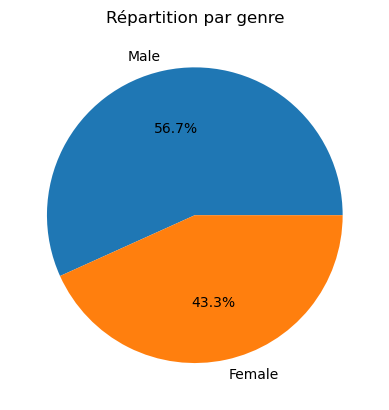

In [18]:
# Calculer la distribution de la variable "genre"
counts = dfsinistre['Gender'].value_counts()

# Créer le graphique en secteurs
fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
ax.set_title('Répartition par genre')

plt.show()

- De cette répresentation, nous pouvons tirer une prémière conclusiion importante:
    Parmis les **57815** véhicules ayant enrégistré au moins un siniistre, **aucun** n'est un véhicule 
    de société.Conclusion: 
  - Faudrait-il n'assurer que les vehicules de société? 

In [19]:
# On maet au format (float) les colonnes associées aux differents montants

dfsinistre.loc[:, ['ClaimAmountRob', 'ClaimAmountPartColl',
                   'ClaimAmountTotColl', 'ClaimAmountFire',
                   'ClaimAmountOther']] = dfsinistre.loc[:,
                                          ['ClaimAmountRob', 'ClaimAmountPartColl',
                                            'ClaimAmountTotColl', 'ClaimAmountFire',
                                           'ClaimAmountOther']].astype(float)
dfsinistre

,Gender,DrivAge,VehYear,VehGroup,StateAb,ExposTotal,ExposFireRob,PremTotal,SumInsAvg,ClaimNbRob,ClaimNbPartColl,ClaimNbTotColl,ClaimNbFire,ClaimNbOther,ClaimAmountRob,ClaimAmountPartColl,ClaimAmountTotColl,ClaimAmountFire,ClaimAmountOther
4,Male,36-45,2009.0,Volvo Caminhoes - Todos,SP,4.55,0,53031.35,301889.74,0,1,0,0,0,0.0,648.0,0.0,0.0,0.0
5,Male,26-35,1998.0,Vw Volkswagen Gol Acima De 1.0,RS,1.00,0,660.59,13574.00,0,1,0,0,2,0.0,2773.0,0.0,0.0,120.0
10,Male,26-35,2010.0,Vw Volkswagen Gol 1.0,MA,10.42,0,12908.31,26540.06,0,1,0,0,2,0.0,1512.0,0.0,0.0,320.0
14,Female,36-45,2004.0,Vw Volkswagen Polo,PR,11.99,0,10070.33,22506.91,0,1,0,0,0,0.0,3965.0,0.0,0.0,0.0
19,Female,26-35,2008.0,Vw Volkswagen Gol 1.0,MA,6.02,0,4956.41,22530.46,0,2,0,0,5,0.0,4263.0,0.0,0.0,309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393060,Female,26-35,2006.0,Vw Volkswagen Polo,BA,13.49,0,13566.46,27735.54,1,1,0,0,9,27366.0,3727.0,0.0,0.0,2467.0
393063,Female,46-55,2002.0,Gm Chevrolet Celta 1.0,AL,6.43,0,4073.31,14856.44,0,1,0,0,1,0.0,2685.0,0.0,0.0,36.0
393065,Male,36-45,2008.0,Renault Logan,PR,10.93,0,6638.54,21084.36,0,2,0,0,0,0.0,2602.0,0.0,0.0,0.0
393067,Male,36-45,2004.0,Toyota Corolla,CE,20.87,0,22992.06,30224.77,0,3,1,0,1,0.0,8083.0,34353.0,0.0,67.0


Calcul de l'age des véhicules assurés

In [20]:
dfsinistre["VehYear"] = 2014 - dfsinistre["VehYear"]
# remplacer les valeurs extrêmes de la variable VehYear par la moyenne

2014.0


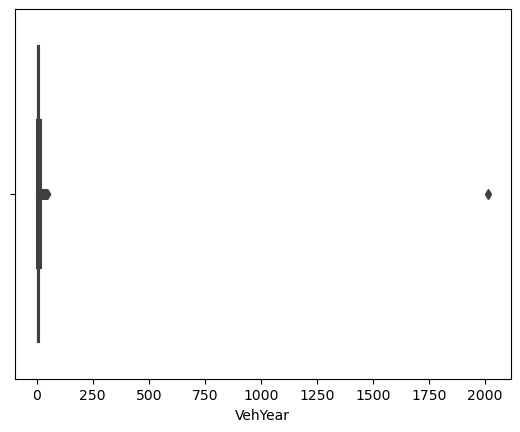

In [21]:
# Detection de valeurs extremes 

sns.boxplot(x=dfsinistre['VehYear'])
print(dfsinistre['VehYear'].max())

# Nous remarquons la présence de valeur extrêmes, on va donc noraliser la variable

In [22]:
# Calculer la moyenne de la colonne 'col'
mean = dfsinistre['VehYear'].mean()

# Calculer l'écart type de la colonne 'col'
std = dfsinistre['VehYear'].std()

# Calculer la limite supérieure
limite_sup = mean + 2*std

# Remplacer les valeurs supérieures à la limite par la limite
dfsinistre['VehYear'] = dfsinistre['VehYear'].clip(upper=limite_sup)


<Axes: xlabel='VehYear'>

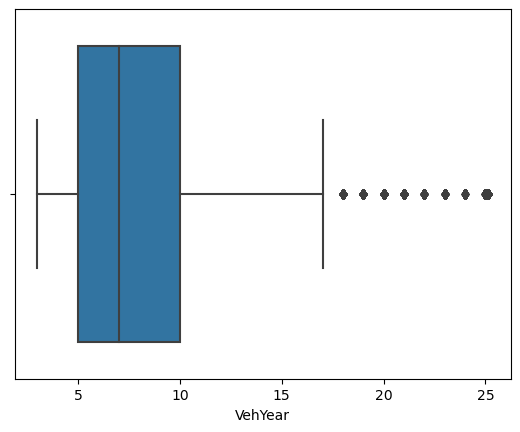

In [23]:
sns.boxplot(x=dfsinistre['VehYear'])

In [24]:
# Calcul du montant total, moyen et de la frequence des sinistres

dfsinistre["montant_total"] = dfsinistre[['ClaimAmountRob', 
                                          'ClaimAmountPartColl',
                                          'ClaimAmountTotColl',
                                          'ClaimAmountFire',
                                          'ClaimAmountOther']].sum(axis=1)
dfsinistre["frequence"] = dfsinistre[['ClaimNbRob', 
                                      'ClaimNbPartColl',
                                      'ClaimNbTotColl', 
                                      'ClaimNbFire',
                                      'ClaimNbOther']].sum(axis=1)
dfsinistre["montant_moyen"] = (dfsinistre["montant_total"] 
                               / dfsinistre["frequence"])


In [25]:
# Pour regarder s'il y a des valeurs au niveau du genre
print(dfsinistre["Gender"].unique())


['Male' 'Female' nan]


In [26]:
# variable age est catégoriel, on doit donc la récoder

print(dfsinistre["DrivAge"].unique())

['36-45' '26-35' nan '>55' '46-55' '18-25']


###  Transformation de la variable DrivAge: age du conducteur du véhicule assuré
   - Si l'âge du proprietaire du véhicule appartient à l'intervalle **18-25 ans**: age = **1**
   - Si l'âge du proprietaire du véhicule appartient à l'intervalle **26-35 ans**: age = **2**
   - Si l'âge du proprietaire du véhicule appartient à l'intervalle **46-55** ans: age = **3**
   - Si l'âge du proprietaire du véhicule est **supérieur à 55 ans** ans: age = **4**
   - **0** si non renseigné
     

In [27]:
dfsinistre['DrivAge'] = dfsinistre['DrivAge'].replace(
    {'18-25': 1, '26-35': 2, '36-45': 3, '46-55': 4, '>55':
     5, np.nan:0}).astype(int)

B=['18-25','26-35','36-45','46-55','>55','inconnu']
[print(dfsinistre['DrivAge'][dfsinistre['DrivAge']==i].count(), B[i]) for i in range(6)]
dfsinistre['DrivAge']

10687 18-25
4337 26-35
13102 36-45
17244 46-55
14158 >55
13633 inconnu


4         3
5         2
10        2
14        3
19        2
         ..
393060    2
393063    4
393065    3
393067    3
393069    2
Name: DrivAge, Length: 73161, dtype: int64

### Tranformation de la variable Gender: genre du conducteur 
  - **0** si le conducteur un homme
  - **1** si c'est une femme
  - **2** sinon

In [28]:
A=['Femmes','Hommes','Non renseigné']
[print(dfsinistre['Gender'][dfsinistre['Gender']==i].count(), A[i]) for i in range(3)]

0 Femmes
0 Hommes
0 Non renseigné


[None, None, None]

In [29]:
 dfsinistre['Gender'] = dfsinistre['Gender'].replace(
    {'Male': 1, 'Female': 2, np.nan:0}).astype(int)
dfsinistre['Gender']

4         1
5         1
10        1
14        2
19        2
         ..
393060    2
393063    2
393065    1
393067    1
393069    2
Name: Gender, Length: 73161, dtype: int64

In [30]:
# Calcul du montant total par assuré

SyntaxError: invalid syntax (3651848695.py, line 1)

In [31]:

# Créer une liste avec les noms de colonnes qui commencent par "Claim"
claim_cols = [col for col in dfsinistre.columns if col.startswith("Claim")]

# Ajouter la nouvelle colonne montant_total
dfsinistre["montant_total"] = dfsinistre[claim_cols].sum(axis=1, skipna=True)

# Remplacer les valeurs NaN dans montant_total avec 0
dfsinistre["montant_total"].fillna(0, inplace=True)
dfsinistre

,Gender,DrivAge,VehYear,VehGroup,StateAb,ExposTotal,ExposFireRob,PremTotal,SumInsAvg,ClaimNbRob,...,ClaimNbFire,ClaimNbOther,ClaimAmountRob,ClaimAmountPartColl,ClaimAmountTotColl,ClaimAmountFire,ClaimAmountOther,montant_total,frequence,montant_moyen
4,1,3,5.0,Volvo Caminhoes - Todos,SP,4.55,0,53031.35,301889.74,0,...,0,0,0.0,648.0,0.0,0.0,0.0,649.0,1,648.000000
5,1,2,16.0,Vw Volkswagen Gol Acima De 1.0,RS,1.00,0,660.59,13574.00,0,...,0,2,0.0,2773.0,0.0,0.0,120.0,2896.0,3,964.333333
10,1,2,4.0,Vw Volkswagen Gol 1.0,MA,10.42,0,12908.31,26540.06,0,...,0,2,0.0,1512.0,0.0,0.0,320.0,1835.0,3,610.666667
14,2,3,10.0,Vw Volkswagen Polo,PR,11.99,0,10070.33,22506.91,0,...,0,0,0.0,3965.0,0.0,0.0,0.0,3966.0,1,3965.000000
19,2,2,6.0,Vw Volkswagen Gol 1.0,MA,6.02,0,4956.41,22530.46,0,...,0,5,0.0,4263.0,0.0,0.0,309.0,4579.0,7,653.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393060,2,2,8.0,Vw Volkswagen Polo,BA,13.49,0,13566.46,27735.54,1,...,0,9,27366.0,3727.0,0.0,0.0,2467.0,33571.0,11,3050.909091
393063,2,4,12.0,Gm Chevrolet Celta 1.0,AL,6.43,0,4073.31,14856.44,0,...,0,1,0.0,2685.0,0.0,0.0,36.0,2723.0,2,1360.500000
393065,1,3,6.0,Renault Logan,PR,10.93,0,6638.54,21084.36,0,...,0,0,0.0,2602.0,0.0,0.0,0.0,2604.0,2,1301.000000
393067,1,3,10.0,Toyota Corolla,CE,20.87,0,22992.06,30224.77,0,...,0,1,0.0,8083.0,34353.0,0.0,67.0,42508.0,5,8500.600000


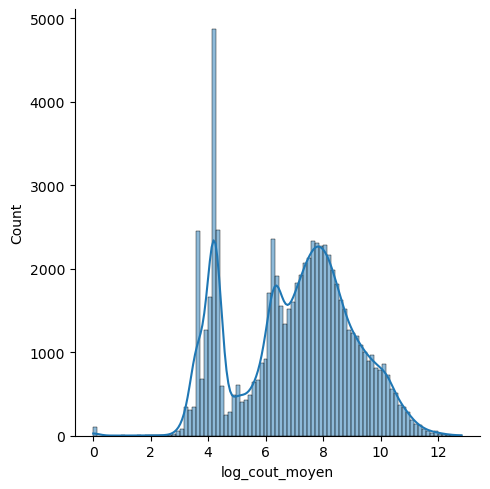

4          5.0
5         16.0
10         4.0
14        10.0
19         6.0
          ... 
393060     8.0
393063    12.0
393065     6.0
393067    10.0
393069     6.0
Name: VehYear, Length: 73161, dtype: float64


In [32]:
dfsinistre["log_cout_moyen"] = dfsinistre["montant_moyen"].apply(log)
sns.displot(data=dfsinistre, x="log_cout_moyen", kde=True)
plt.show()

dfsinistre["VehYear"] = dfsinistre["VehYear"].replace(np.nan, 7.986344306363476)
print(dfsinistre['VehYear'])



In [33]:
def categorisation(données):
    limite_montant = 50000
    limite_nb_sinistre = 5
    danger = limite_montant * limite_nb_sinistre
    # print((dfsinistre['frequence'] > 5).sum()
    # and (dfsinistre['montant_total'] > 50000).sum())
    données['Danger'] = (données['montant_total'] *
                         données['frequence']) / danger
    # print(données['Danger'])

    conditions = [données['Danger'] > 1,
                  données['Danger'] > 0.3,
                  données['Danger'] <= 0.3
                  ]
    # Catégorisation des conducteurs
    choices = ['Dangereux', 'À surveiller', 'Bon conducteur']

    # Utilisation de np.select pour affecter les choix en fonction des conditions
    données['Niveau de risque'] = np.select(conditions, choices,
                                            default='Bon conducteur')

    nb_conducteurs_dangereux = len(données[données['Danger'] > 1])
    nb_conducteurs_à_surveiller = len(données[données['Danger'] > 0.3])
    nb_bon_conducteurs = len(données[données['Danger'] <= 1])

    # Pour regarder le nombre de conducteurs par catégorie
    print('Dangereux', nb_conducteurs_dangereux)
    print('À surveiller', nb_conducteurs_à_surveiller)
    print('Bon conducteur', nb_bon_conducteurs)
    return données

categorisation(dfsinistre)

Dangereux 4594
À surveiller 9966
Bon conducteur 68567


,Gender,DrivAge,VehYear,VehGroup,StateAb,ExposTotal,ExposFireRob,PremTotal,SumInsAvg,ClaimNbRob,...,ClaimAmountPartColl,ClaimAmountTotColl,ClaimAmountFire,ClaimAmountOther,montant_total,frequence,montant_moyen,log_cout_moyen,Danger,Niveau de risque
4,1,3,5.0,Volvo Caminhoes - Todos,SP,4.55,0,53031.35,301889.74,0,...,648.0,0.0,0.0,0.0,649.0,1,648.000000,6.473891,0.002596,Bon conducteur
5,1,2,16.0,Vw Volkswagen Gol Acima De 1.0,RS,1.00,0,660.59,13574.00,0,...,2773.0,0.0,0.0,120.0,2896.0,3,964.333333,6.871437,0.034752,Bon conducteur
10,1,2,4.0,Vw Volkswagen Gol 1.0,MA,10.42,0,12908.31,26540.06,0,...,1512.0,0.0,0.0,320.0,1835.0,3,610.666667,6.414551,0.022020,Bon conducteur
14,2,3,10.0,Vw Volkswagen Polo,PR,11.99,0,10070.33,22506.91,0,...,3965.0,0.0,0.0,0.0,3966.0,1,3965.000000,8.285261,0.015864,Bon conducteur
19,2,2,6.0,Vw Volkswagen Gol 1.0,MA,6.02,0,4956.41,22530.46,0,...,4263.0,0.0,0.0,309.0,4579.0,7,653.142857,6.481796,0.128212,Bon conducteur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393060,2,2,8.0,Vw Volkswagen Polo,BA,13.49,0,13566.46,27735.54,1,...,3727.0,0.0,0.0,2467.0,33571.0,11,3050.909091,8.023195,1.477124,Dangereux
393063,2,4,12.0,Gm Chevrolet Celta 1.0,AL,6.43,0,4073.31,14856.44,0,...,2685.0,0.0,0.0,36.0,2723.0,2,1360.500000,7.215608,0.021784,Bon conducteur
393065,1,3,6.0,Renault Logan,PR,10.93,0,6638.54,21084.36,0,...,2602.0,0.0,0.0,0.0,2604.0,2,1301.000000,7.170888,0.020832,Bon conducteur
393067,1,3,10.0,Toyota Corolla,CE,20.87,0,22992.06,30224.77,0,...,8083.0,34353.0,0.0,67.0,42508.0,5,8500.600000,9.047892,0.850160,À surveiller


##### Modèle basique

# Modélisation

In [34]:
dfsinistre.drop(['VehGroup', 'StateAb'], axis=1, inplace=True)
dfsinistre

,Gender,DrivAge,VehYear,ExposTotal,ExposFireRob,PremTotal,SumInsAvg,ClaimNbRob,ClaimNbPartColl,ClaimNbTotColl,...,ClaimAmountPartColl,ClaimAmountTotColl,ClaimAmountFire,ClaimAmountOther,montant_total,frequence,montant_moyen,log_cout_moyen,Danger,Niveau de risque
4,1,3,5.0,4.55,0,53031.35,301889.74,0,1,0,...,648.0,0.0,0.0,0.0,649.0,1,648.000000,6.473891,0.002596,Bon conducteur
5,1,2,16.0,1.00,0,660.59,13574.00,0,1,0,...,2773.0,0.0,0.0,120.0,2896.0,3,964.333333,6.871437,0.034752,Bon conducteur
10,1,2,4.0,10.42,0,12908.31,26540.06,0,1,0,...,1512.0,0.0,0.0,320.0,1835.0,3,610.666667,6.414551,0.022020,Bon conducteur
14,2,3,10.0,11.99,0,10070.33,22506.91,0,1,0,...,3965.0,0.0,0.0,0.0,3966.0,1,3965.000000,8.285261,0.015864,Bon conducteur
19,2,2,6.0,6.02,0,4956.41,22530.46,0,2,0,...,4263.0,0.0,0.0,309.0,4579.0,7,653.142857,6.481796,0.128212,Bon conducteur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393060,2,2,8.0,13.49,0,13566.46,27735.54,1,1,0,...,3727.0,0.0,0.0,2467.0,33571.0,11,3050.909091,8.023195,1.477124,Dangereux
393063,2,4,12.0,6.43,0,4073.31,14856.44,0,1,0,...,2685.0,0.0,0.0,36.0,2723.0,2,1360.500000,7.215608,0.021784,Bon conducteur
393065,1,3,6.0,10.93,0,6638.54,21084.36,0,2,0,...,2602.0,0.0,0.0,0.0,2604.0,2,1301.000000,7.170888,0.020832,Bon conducteur
393067,1,3,10.0,20.87,0,22992.06,30224.77,0,3,1,...,8083.0,34353.0,0.0,67.0,42508.0,5,8500.600000,9.047892,0.850160,À surveiller


## Random Rorest

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


def random_forest(df):
# Charger les données et les prétraiter si nécessaire

    # Diviser les données en ensemble d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(df[['Gender', 'DrivAge', 'VehYear', 'ExposTotal',
                                                            'ExposFireRob', 'PremTotal', 'SumInsAvg', 
                                                            'ClaimNbRob','ClaimNbFire', 'ClaimNbOther', 
                                                            'ClaimAmountRob',  'ClaimAmountPartColl', 
                                                            'ClaimAmountTotColl', 'ClaimAmountFire',
                                                            'ClaimAmountOther', 'montant_total', 'frequence',
                                                                    'montant_moyen','log_cout_moyen']],
                                                        df['Niveau de risque'], test_size=0.2, random_state=42)

    # Instancier et entraîner le scaler
    scaler = StandardScaler()
    scaler.fit(X_train)

    # Normaliser les données d'entraînement et de test
    X_train_norm = scaler.transform(X_train)
    X_test_norm = scaler.transform(X_test)

    # Instancier et entraîner le modèle de Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_norm, y_train)

    # Faire des prédictions sur l'ensemble de test
    y_pred = rf.predict(X_test_norm)

    # Afficher le rapport de classification
    print(classification_report(y_test, y_pred))
    
random_forest(dfsinistre)


                precision    recall  f1-score   support

Bon conducteur       1.00      1.00      1.00     12634
     Dangereux       0.99      0.99      0.99       930
  À surveiller       0.99      0.99      0.99      1069

      accuracy                           1.00     14633
     macro avg       0.99      0.99      0.99     14633
  weighted avg       1.00      1.00      1.00     14633



In [36]:
#!pip install --upgrade tensorflow
#!pip install --upgrade keras
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [1]:
# prediction_keras(dfsinistre)

NameError: name 'prediction_keras' is not defined

## Algorithme pragmatique

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Charger et préparer les données X et y
X = dfsinistre[['Gender', 'DrivAge', 'VehYear', 'ExposTotal', 'ExposFireRob', 'PremTotal',
        'SumInsAvg', 'ClaimNbRob', 'ClaimNbPartColl', 'ClaimNbTotColl',
        'ClaimAmountPartColl', 'ClaimAmountTotColl', 'ClaimAmountFire',
        'ClaimAmountOther', 'montant_total', 'frequence', 'montant_moyen']]
y = dfsinistre['log_cout_moyen']

# Encoder les variables catégorielles
encodage = LabelEncoder()
X['Gender'] = encodage.fit_transform(X['Gender'])

# Normaliser les variables continues
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convertir en tableaux numpy
X = np.asarray(X)
y = np.asarray(y)

# Séparer les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Définir le modèle de régression logistique avec Keras
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compiler le modèle
model.compile(loss='mse', optimizer='adam')

# Entraîner le modèle
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Évaluer les performances du modèle sur l'ensemble de test
mse, _ = model.evaluate(X_test, y_test)
print('MSE: ', mse)

# Faire des prédictions avec le modèle entraîné
y_pred = model.predict(X_test)

# Comparer les prédictions avec les valeurs réelles
for i in range(10):
    print('Prédiction: ', y_pred[i], ' - Valeur réelle: ', y_test[i])


In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
mail = 1
# Adresse e-mail et mot de passe pour se connecter à votre compte Gmail
gmail_address = "boubacarbah818@gmail.com"
gmail_password = "rlsfursodrcxiaio"

# Adresse e-mail du destinataire
to_address = "boubacarbah818@icloud.com"

# Objet et contenu de l'e-mail
subject = "Mise à jour des données"
body = " Alerte!!!"



if mail == 1: #ça envoie le mail si mail = 1
    # Créer le message
    msg = MIMEMultipart()
    msg["From"] = gmail_address
    msg["To"] = to_address
    msg["Subject"] = subject
    msg.attach(MIMEText(body, "plain"))

    # Envoyer le message
    with smtplib.SMTP("smtp.gmail.com", 587) as server:
        server.starttls()
        server.login(gmail_address, gmail_password)
        server.sendmail(gmail_address, to_address, msg.as_string())

    mail = 0 #ça remet mail à 0 pour ne pas renvoyer le mail à chaque fois qu'on lance le programme

##### Conclusion

Grâce à la grande quantité de données disponibles et à l'utilisation de modèles de deep learning tels que les réseaux de neurones, notre système a pu apprendre des schémas complexes dans les données et fournir des prédictions précises sur les risques d'accidents de voiture.

Ce projet a été une excellente occasion de démontrer les avantages de l'utilisation de l'IA dans l'industrie de l'assurance. J'ai l'intention de retravailler le thème très prochainement pour développer un vrai systèmee que j'espèree c pourra être utilisé par les assureurs  pour améliorer leurs processus de souscription et offrir des polices d'assurance plus adaptées aux besoins de leurs clients tout en minimisant leurs dépenses .




